 انتخاب منبع و استخراج داده (Web Scraping)

In [1]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
"""
for less rate i have : https://taaghche.com/book-review/882/%D8%A8%D9%88%D9%81-%DA%A9%D9%88%D8%B1
https://taaghche.com/book-review/95170/%DA%A9%D8%AA%D8%A7%D8%A8%D8%AE%D8%A7%D9%86%D9%87-%D9%86%DB%8C%D9%85%D9%87-%D8%B4%D8%A8
"""
url = "https://taaghche.com/book-review/882/%D8%A8%D9%88%D9%81-%DA%A9%D9%88 %D8%B1"
driver.get(url)
print("✅ صفحه باز شد!")

all_main_comments = []
page = 1

try:
    while True:
        last_height = driver.execute_script("return document.body.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        comment_blocks = driver.find_elements(By.CLASS_NAME, "bookComments_comment___TU8v")
        for block in comment_blocks:
            try:
                block_class = block.get_attribute("class")
                parent_class = block.find_element(By.XPATH, "..").get_attribute("class")
                if "bookComments_replies__dXS_n" in block_class or "bookComments_replies__dXS_n" in parent_class:
                    continue
                text_elem = block.find_element(By.CLASS_NAME, "bookComments_content___9Xbz")
                text = text_elem.text.strip()
                stars_count = len(block.find_elements(By.CLASS_NAME, "icon-star-2"))
                if (text, stars_count) not in all_main_comments:
                    all_main_comments.append((text, stars_count))
            except:
                continue

        print(f"✅ صفحه {page}: تعداد کل دیدگاه‌های استخراج‌شده: {len(all_main_comments)}")

        if len(all_main_comments) >= 1200:
            print("🎉 به ۱۲۰۰ دیدگاه رسیدیم!")
            break

        try:
            more_button = driver.find_element(By.CLASS_NAME, "bookComments_moreButton__1xrpL")
            driver.execute_script("arguments[0].scrollIntoView({behavior: 'smooth', block: 'center'});", more_button)
            time.sleep(1)
            driver.execute_script("arguments[0].click();", more_button)
            time.sleep(3)
            page += 1
        except:
            print("❌ دکمه 'نمایش بیشتر' پیدا نشد. احتمالاً به آخر رسیدیم.")
            break

finally:
    driver.quit() 
    print("✅ مرورگر بسته شد.")




✅ صفحه باز شد!
✅ صفحه 1: تعداد کل دیدگاه‌های استخراج‌شده: 50
✅ صفحه 2: تعداد کل دیدگاه‌های استخراج‌شده: 100
✅ صفحه 3: تعداد کل دیدگاه‌های استخراج‌شده: 150
✅ صفحه 4: تعداد کل دیدگاه‌های استخراج‌شده: 200
✅ صفحه 5: تعداد کل دیدگاه‌های استخراج‌شده: 250
✅ صفحه 6: تعداد کل دیدگاه‌های استخراج‌شده: 300
✅ صفحه 7: تعداد کل دیدگاه‌های استخراج‌شده: 350
✅ صفحه 8: تعداد کل دیدگاه‌های استخراج‌شده: 398
✅ صفحه 9: تعداد کل دیدگاه‌های استخراج‌شده: 445
✅ صفحه 10: تعداد کل دیدگاه‌های استخراج‌شده: 495
✅ صفحه 11: تعداد کل دیدگاه‌های استخراج‌شده: 542
✅ صفحه 12: تعداد کل دیدگاه‌های استخراج‌شده: 591
✅ صفحه 13: تعداد کل دیدگاه‌های استخراج‌شده: 639
✅ صفحه 14: تعداد کل دیدگاه‌های استخراج‌شده: 688
✅ صفحه 15: تعداد کل دیدگاه‌های استخراج‌شده: 738
✅ صفحه 16: تعداد کل دیدگاه‌های استخراج‌شده: 788
✅ صفحه 17: تعداد کل دیدگاه‌های استخراج‌شده: 836
✅ صفحه 18: تعداد کل دیدگاه‌های استخراج‌شده: 886
✅ صفحه 19: تعداد کل دیدگاه‌های استخراج‌شده: 934
✅ صفحه 20: تعداد کل دیدگاه‌های استخراج‌شده: 982
✅ صفحه 21: تعداد کل دیدگاه‌های استخ

In [5]:
df = pd.DataFrame(all_main_comments, columns=["review_text", "stars"])
df.to_csv("C:\\Users\\Sepehr\\SentimentProject\\data\\raw_reviews.csv", index=False, encoding="utf-8-sig")
print(f"💾 داده‌ها در فایل ذخیره شدند! تعداد نهایی دیدگاه‌ها: {len(df)}")

print("\n📋 نمونه دیدگاه‌ها:")
for i, (text, stars_count) in enumerate(all_main_comments[:10], 1):
    print(f"دیدگاه {i}:") 
    print(f"متن: {text}")
    print(f"امتیاز: {stars_count} ستاره")
    print("-" * 50)

💾 داده‌ها در فایل ذخیره شدند! تعداد نهایی دیدگاه‌ها: 1140

📋 نمونه دیدگاه‌ها:
دیدگاه 1:
متن: با سلام به نظر من کسی که از ادبیات سر در می آورد ، همان اوایل کتاب متوجه می شود که با یک شاهکار روبروست . لازم نیست با جهان بینی نویسنده موافق باشیم ، لازم نیست فضای ذهنی نویسنده را دوست بداریم ، یا از خواندن کتاب لذت ببریم(این کتاب برای لذت بردن نوشته نشده)، برای این که بدانیم این رمان یک شاهکار است . هر چند فهم کامل کتاب مشکل است ، اما این به خواننده بر می گردد و نه به نویسنده . اتفاقا مشخص است که نویسنده برای این اثر وقت گذاشته و رویش کار کرده . با نظرات برخی در مورد ایجاد تمایل به خودکشی در خواننده و .. موافق نیستم . آیا کسی که داستان جنایی می خواند ، تمایل به جنایت پیدا می کند ؟ چنین چیزی هر چند ناممکن نیست ، به هیچ وجه معمول هم نیست . البته از نظر من خواندن آن به دلیل در بر داشتن مضامینی همچون خیانت در زندگی زناشویی و.. ، برای زیر بیست و اندی سال توصیه نمی شود . چرا که امید می رود جوانترها در فضای فکری پاک و زلالی رشد کنند و پرورش یابند و ذهنشان درگیر مسائل خاص نشود .
امتیاز: 4 ستاره
----

پاکسازی و پیش‌پردازش متن

In [14]:
import pandas as pd
import re
from pathlib import Path
from hazm import Normalizer, Lemmatizer, word_tokenize, stopwords_list

BASE_DIR = Path("C:/Users/Sepehr/SentimentProject")
RAW_PATH = BASE_DIR / "data" / "raw_reviews.csv"
CLEANED_PATH = BASE_DIR / "data" / "cleaned_reviews.csv"
CLEANED_XLSX_PATH = BASE_DIR / "data" / "cleaned_reviews.xlsx"

CLEANED_PATH.parent.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(RAW_PATH, encoding="utf-8-sig")
print(f"Total raw data: {len(df)}")

df.drop_duplicates(subset=["review_text"], inplace=True)
df.dropna(subset=["review_text"], inplace=True)
print(f"After removing duplicates/empty rows: {len(df)}")

def label_sentiment(stars):
    if stars >= 4:
        return 1
    elif stars < 3:
        return 0
    else:
        return None

df["label"] = df["stars"].apply(label_sentiment)
df = df.dropna(subset=["label"])
df["label"] = df["label"].astype(int)
print("Sentiment label distribution:")
print(df["label"].value_counts())

normalizer = Normalizer()
lemmatizer = Lemmatizer()
stopwords = set(stopwords_list())

extended_stopwords = {
    "ها", "های", "یه", "ای", "این", "آن", "را", "و", "با", "در", "به", "از", "که", "می", "شد", "شده",
    "است", "بود", "برای", "تا", "هر", "هم", "چون", "ولی", "اگر", "چرا", "کجا", "چه", "کدام", "همه",
    "هیچ", "بعضی", "چند", "یکی", "دیگر", "خود", "ما", "شما", "ایشان", "اون", "اینجا", "آنجا",
    "هست", "نیست", "بودن", "باش", "کنه", "گیر", "داره", "میشه", "بشه", "داشت", "داشتن", "خواهد",
    "کتاب", "زندگی", "داستان", "نورا", "صفحه", "نویسنده" ,"واقعا", "خوندن", "میکنه", "باشه", "هدایت", "صادق", "بوف", "کور", "نوشته","حسرت", "نمی", "خوند"
}


stopwords.update(extended_stopwords)

def preprocess_text(text: str) -> str:
    text = normalizer.normalize(str(text))
    text = re.sub(r"[^\u0600-\u06FF\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    processed_tokens = []
    for word in tokens:
        word = lemmatizer.lemmatize(word)
        if "#" in word:
            word = word.split("#")[-1]
        if word not in stopwords and len(word) > 2 and not word.isnumeric():
            processed_tokens.append(word)
    return " ".join(processed_tokens) if processed_tokens else ""

df["cleaned_text"] = df["review_text"].apply(preprocess_text)

df_cleaned = df[["cleaned_text", "label"]].copy()
df_cleaned = df_cleaned[df_cleaned["cleaned_text"].str.strip() != ""]

print("Class distribution before balancing check:")
print(df_cleaned["label"].value_counts())
if df_cleaned["label"].value_counts().min() / df_cleaned["label"].value_counts().max() < 0.5:
    print("Warning: Significant class imbalance detected. Consider balancing techniques.")

df_cleaned.to_csv(CLEANED_PATH, index=False, encoding="utf-8-sig")
# try:
#     df_cleaned.to_excel(CLEANED_XLSX_PATH, index=False)
#     excel_saved = True
# except Exception as e:
#     print(f"Error saving Excel file: {e}")
#     excel_saved = False

print(f"Cleaned CSV saved: {CLEANED_PATH.exists()}")
# print(f"Cleaned Excel saved: {excel_saved}")
print(f"Number of cleaned rows: {len(df_cleaned)}")

print("\nSample cleaned data:")
print(df_cleaned.sample(10))

Total raw data: 1140
After removing duplicates/empty rows: 1137
Sentiment label distribution:
label
1    688
0    340
Name: count, dtype: int64
Class distribution before balancing check:
label
1    647
0    336
Name: count, dtype: int64
Cleaned CSV saved: True
Number of cleaned rows: 983

Sample cleaned data:
                                           cleaned_text  label
662   حرف نداره تخیل نداره انگیزه معنا واقعی کلمه سو...      1
1103  نظرم نگاه دنیا نگاه منفی دکتر شریعتی دردهدایت ...      0
393   فضای راز آلای پیچ فضای رازالودی میره جالبه میخ...      1
1065                                       وجهی هاش کرو      1
136   کتابی سبک قطعا بهترینه متن متنه مخوف بعدی شناو...      1
278   بدونین شخصیت آقا نفر شخصیت خانوم نفر هستن درک کمک      1
488                         خوبیه حتما پیشنهاد دقت خوان      1
515                                              شاهکار      1
202   دوستان ظاهر مقایسه درک مفاهیم گرانبهایش عاجز ب...      1
670   ادبی العاده توصیفات دقیق خفن شخصا متنفر احساس ...    

تحلیل اکتشافی داده‌ها (EDA).

In [15]:
import pandas as pd

df = pd.read_csv(CLEANED_PATH, encoding="utf-8-sig")

df["cleaned_text"] = df["cleaned_text"].astype(str)

df["text_length"] = df["cleaned_text"].apply(len)

print("📌 آمار توصیفی طول نظرات:")
print(df["text_length"].describe())

print("\n📌 توزیع برچسب‌ها (احساسات):")
print(df["label"].value_counts())


📌 آمار توصیفی طول نظرات:
count     983.000000
mean       92.646999
std       129.085206
min         3.000000
25%        22.000000
50%        53.000000
75%       110.000000
max      1356.000000
Name: text_length, dtype: float64

📌 توزیع برچسب‌ها (احساسات):
label
1    647
0    336
Name: count, dtype: int64


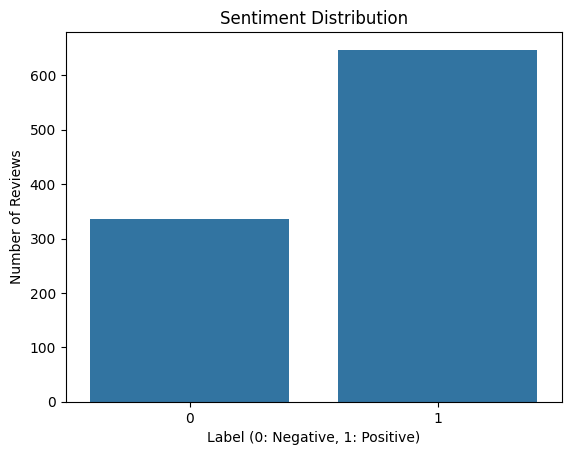

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="label", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Label (0: Negative, 1: Positive)")
plt.ylabel("Number of Reviews")
plt.show()


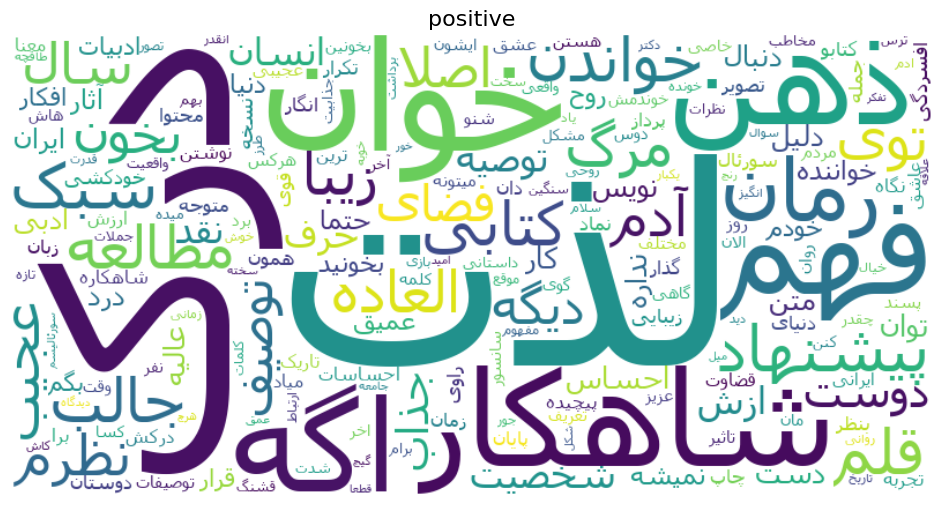

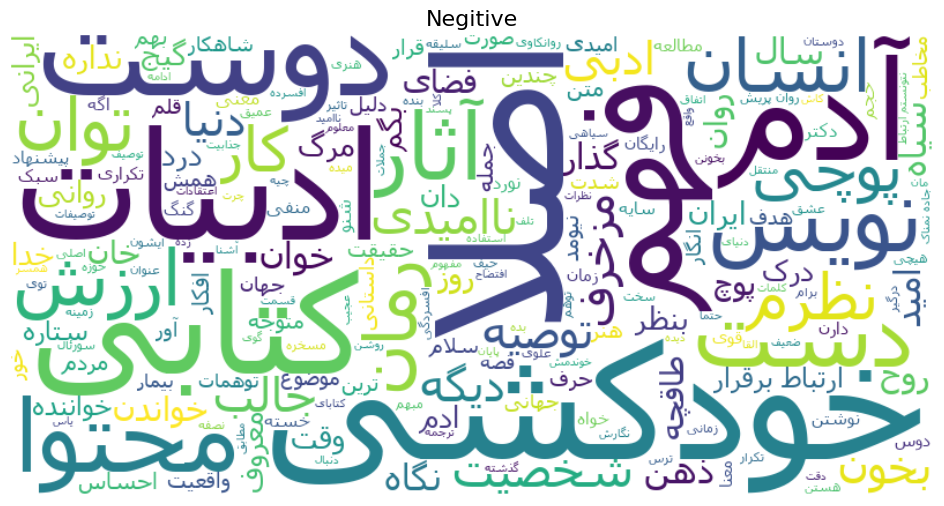

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

def reshape_text(text: str) -> str:
    reshaped_text = arabic_reshaper.reshape(text)  
    return get_display(reshaped_text)  

positive_text = " ".join(df[df["label"] == 1]["cleaned_text"])
negative_text = " ".join(df[df["label"] == 0]["cleaned_text"])

positive_text = reshape_text(positive_text)
negative_text = reshape_text(negative_text)


font_path = "C:/Windows/Fonts/tahoma.ttf"

wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=font_path,
    stopwords=stopwords
).generate(positive_text)

wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=font_path,
    stopwords=stopwords
).generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("positive", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negitive", fontsize=16)
plt.show()


In [ ]:
from collections import Counter

def top_words(texts, n=18):
    all_words = " ".join(texts).split()
    counter = Counter(all_words)
    return counter.most_common(n)

print("📌 Most frequent words in positive reviews:")
print(top_words(df[df["label"]==1]["cleaned_text"]))

print("\n📌 Most frequent words in negative reviews:") 
print(top_words(df[df["label"]==0]["cleaned_text"]))



📌 Most frequent words in positive reviews:
[('لذت', 68), ('شاهکار', 60), ('درک', 57), ('خوان', 54), ('ذهن', 53), ('سبک', 50), ('فهم', 49), ('اگه', 49), ('رمان', 47), ('ادبیات', 44), ('پیشنهاد', 42), ('مطالعه', 41), ('قلم', 41), ('خواندن', 39), ('جالب', 39), ('مرگ', 38), ('کتابی', 37), ('حتما', 37)]

📌 Most frequent words in negative reviews:
[('اصلا', 43), ('خودکشی', 39), ('ادبیات', 34), ('فهم', 30), ('آدم', 29), ('کتابی', 29), ('دوست', 28), ('ارزش', 26), ('محتوا', 26), ('آثار', 22), ('دست', 22), ('روان', 22), ('نویس', 22), ('انسان', 21), ('رمان', 21), ('ادبی', 21), ('توان', 21), ('نظرم', 20)]


: بردارسازی متون (Text Vectorization)

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import save_npz

df = pd.read_csv("C:/Users/Sepehr/SentimentProject/data/cleaned_reviews.csv", encoding="utf-8-sig")

X_texts = df["cleaned_text"].astype(str)
y = df["label"]

count_vectorizer = CountVectorizer(max_features=4000, ngram_range=(1, 2), min_df=5, max_df=0.95)
X_count = count_vectorizer.fit_transform(X_texts)

tfidf_vectorizer = TfidfVectorizer(max_features=4000, ngram_range=(1, 2), min_df=5, max_df=0.95)
X_tfidf = tfidf_vectorizer.fit_transform(X_texts)


print("✅ شکل ماتریس ویژگی‌ها:")
print("CountVectorizer:", X_count.shape)
print("TfidfVectorizer:", X_tfidf.shape)

print("\n📌 ۲۰ ویژگی اول CountVectorizer:")
print(count_vectorizer.get_feature_names_out()[:40])

print("\n📌 ۲۰ ویژگی اول TfidfVectorizer:")
print(tfidf_vectorizer.get_feature_names_out()[:40])

print("\n📌 پیش‌نمایش ماتریس CountVectorizer:")
print(pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out()).head())

print("\n📌 پیش‌نمایش ماتریس TfidfVectorizer:")
print(pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).head())

✅ شکل ماتریس ویژگی‌ها:
CountVectorizer: (983, 724)
TfidfVectorizer: (983, 724)

📌 ۲۰ ویژگی اول CountVectorizer:
['آثار' 'آخر' 'آخرش' 'آدم' 'آدمو' 'آدمی' 'آشنا' 'آشنایی' 'آقا' 'آلای'
 'آنقدر' 'آور' 'آینده' 'ابهام' 'اتفاق' 'اتفاقات' 'اثار' 'اثری' 'اثیری'
 'اجتماعی' 'احترام' 'احساس' 'احساسات' 'اختیار' 'اخر' 'ادامه' 'ادب' 'ادبی'
 'ادبیات' 'ادبیات ایران' 'ادبیات داستانی' 'ادبیات معاصر' 'ادبیه' 'ادم'
 'ارتباط' 'ارتباط برقرار' 'ارزش' 'ارزش خواندن' 'ارزش نداره' 'ازش']

📌 ۲۰ ویژگی اول TfidfVectorizer:
['آثار' 'آخر' 'آخرش' 'آدم' 'آدمو' 'آدمی' 'آشنا' 'آشنایی' 'آقا' 'آلای'
 'آنقدر' 'آور' 'آینده' 'ابهام' 'اتفاق' 'اتفاقات' 'اثار' 'اثری' 'اثیری'
 'اجتماعی' 'احترام' 'احساس' 'احساسات' 'اختیار' 'اخر' 'ادامه' 'ادب' 'ادبی'
 'ادبیات' 'ادبیات ایران' 'ادبیات داستانی' 'ادبیات معاصر' 'ادبیه' 'ادم'
 'ارتباط' 'ارتباط برقرار' 'ارزش' 'ارزش خواندن' 'ارزش نداره' 'ازش']

📌 پیش‌نمایش ماتریس CountVectorizer:
   آثار  آخر  آخرش  آدم  آدمو  آدمی  آشنا  آشنایی  آقا  آلای  ...  گوش  گوی  \
0     0    0     0    0     0    

In [20]:
df["label"].value_counts()

label
1    647
0    336
Name: count, dtype: int64

 مدلسازی یادگیری ماشین

In [21]:
import numpy as np
indices = np.where(y == 0)[0]
# print(indices)
count_0 = len(indices)
print(count_0)

indices = np.where(y == 1)[0]
# print(indices)
count_1 = len(indices)
print(count_1)

weight = round(count_1/count_0)
print("____________________________________", "\n", weight)


336
647
____________________________________ 
 2


Logistic Regression - CV F1-score (micro avg): 0.8034401319777127

📌 Logistic Regression:
Accuracy: 0.7157360406091371
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        67
           1       0.82      0.72      0.77       130

    accuracy                           0.72       197
   macro avg       0.70      0.71      0.70       197
weighted avg       0.74      0.72      0.72       197


📌 Random Forest:
Accuracy: 0.7055837563451777
              precision    recall  f1-score   support

           0       0.59      0.43      0.50        67
           1       0.74      0.85      0.79       130

    accuracy                           0.71       197
   macro avg       0.67      0.64      0.65       197
weighted avg       0.69      0.71      0.69       197



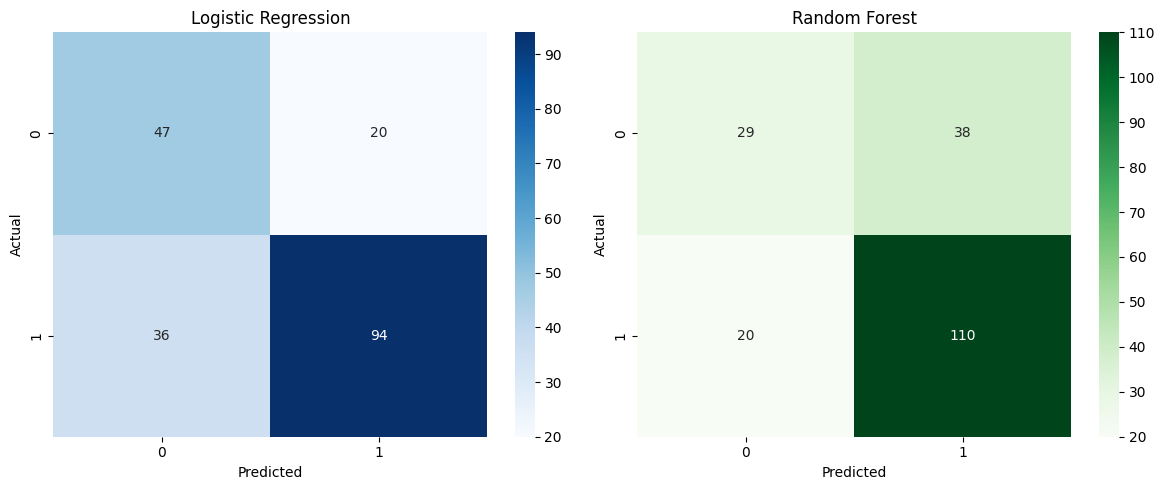

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/Sepehr/SentimentProject/data/cleaned_reviews.csv", encoding="utf-8-sig")
X_texts = df["cleaned_text"].astype(str)
y = df["label"]

X = X_tfidf

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
log_reg = LogisticRegression(
    max_iter=3000,
    solver='saga',           
    penalty='elasticnet',    
    l1_ratio=0.5,            
    C=1.6,                   
    class_weight='balanced', 
    random_state=42
)
# log_reg = LogisticRegression(
#     max_iter=2000,
#     solver='saga',      
#     class_weight='balanced', 
#     random_state=42
# )


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(log_reg, X_train, y_train, cv=skf, scoring='f1')
print("Logistic Regression - CV F1-score (micro avg):", np.mean(f1_scores))

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


rf = RandomForestClassifier(
    n_estimators=700,          
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("\n📌 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=2, zero_division=0))

print("\n📌 Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=2, zero_division=0))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
